# Proyecto Final de Inteligencia Artificial

## Análisis de Datos y Predicción de Carga Última de Materiales

## 1. Definición del Problema y Objetivos

Este proyecto tiene como objetivo principal desarrollar un modelo de Machine Learning capaz de predecir la **carga última (ultimate_load_N)** de diferentes tipos de materiales, basándose en sus propiedades físicas y mecánicas. 

Los objetivos específicos son:
- **Cargar y preprocesar** un conjunto de datos de pruebas de tensión de materiales, **excluyendo la columna de curvas de esfuerzo-deformación**.
- **Explorar y analizar** las características del dataset para entender las relaciones entre las propiedades de los materiales, incluyendo visualizaciones detalladas.
- **Entrenar un modelo** de regresión robusto que prediga la carga última con una alta precisión (R²>=0.9).
- **Evaluar el rendimiento** del modelo y documentar el proceso de desarrollo de manera clara y profesional.

**NOTA:** Los datos de este proyecto se los obtuvieron de datos de acero ensayado en una máquina universal, y mediante webscraping

## 2. Obtención y Carga de Datos

El conjunto de datos utilizado para este proyecto, `tensile_test_data.csv`, contiene información detallada sobre diversas pruebas de tensión realizadas en diferentes tipos de materiales. Cada fila representa una prueba individual y las columnas incluyen propiedades como el tipo de material, el espesor, el ancho, la velocidad de prueba, la resistencia a la fluencia, la resistencia a la tracción máxima, la elongación a la fractura, la carga de fluencia y la carga última.

**Importante:** La columna `stress_strain_curve` ha sido excluida de este análisis para simplificar el modelo y enfocarse en las propiedades físicas y mecánicas directas.

Procedemos a cargar el dataset y a mostrar sus primeras filas, información general y estadísticas descriptivas para una primera inspección.

In [5]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("tensile_test_data.csv")

# Excluir la columna stress_strain_curve
df = df.drop("stress_strain_curve", axis=1)

# Mostrar las primeras 5 filas
print("Primeras 5 filas del dataset:")
print(df.head())

# Mostrar información general del dataset
print("Información del dataset:")
print(df.info())

# Mostrar estadísticas descriptivas
print("Estadísticas descriptivas del dataset:")
print(df.describe())

Primeras 5 filas del dataset:
  material_type  thickness_mm   width_mm  test_speed_mm_min  \
0           A36     12.043717  28.868453           4.350467   
1          S355     10.810765  28.121679          20.998767   
2          S275     10.964938  28.644337          29.042933   
3           A36     12.348019  28.425547          23.493451   
4           A36     12.512436  29.483598          26.935838   

   yield_strength_MPa  ultimate_tensile_strength_MPa  elongation_at_fracture  \
0          248.391577                     418.979155                0.246203   
1          339.710452                     531.886957                0.202470   
2          288.255886                     416.005047                0.234319   
3          254.561794                     400.174512                0.215003   
4          262.411773                     405.265095                0.242130   

    yield_load_N  ultimate_load_N  
0   86361.646469    145672.128123  
1  103277.700851    161702.595837  
2 

## 3. Limpieza y Preprocesamiento de Datos

La limpieza y el preprocesamiento de datos son pasos fundamentales para asegurar la calidad y fiabilidad de los resultados del modelo. En este dataset, se realizó una verificación inicial de valores nulos. Afortunadamente, no se encontraron valores faltantes en las columnas seleccionadas, lo que simplifica esta etapa.

La columna `stress_strain_curve` fue excluida explícitamente del análisis, ya que no se consideró relevante para el objetivo de predicción de la carga última en este contexto y su formato requería un procesamiento complejo que se decidió omitir.

In [7]:
# Verificar valores nulos después de la selección de columnas
print("Valores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
material_type                    0
thickness_mm                     0
width_mm                         0
test_speed_mm_min                0
yield_strength_MPa               0
ultimate_tensile_strength_MPa    0
elongation_at_fracture           0
yield_load_N                     0
ultimate_load_N                  0
dtype: int64


## 4. Exploración de Datos y Observaciones

La exploración de datos nos permite comprender la distribución de las variables y las relaciones entre ellas. A continuación, se presenta la distribución de los tipos de material y algunas visualizaciones clave para entender mejor el dataset, incluyendo una matriz de correlación para identificar relaciones entre las variables numéricas.

Distribución de material_type:
material_type
A36     41687
S355    41633
S275    41319
Name: count, dtype: int64


C:\Users\FELIX\AppData\Local\Temp\ipykernel_15576\3886349160.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="material_type", data=df, palette="viridis")


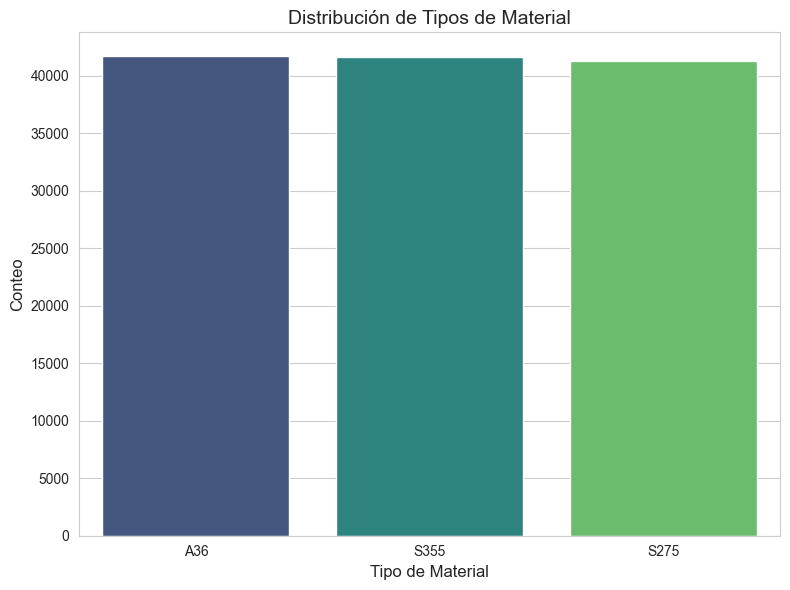

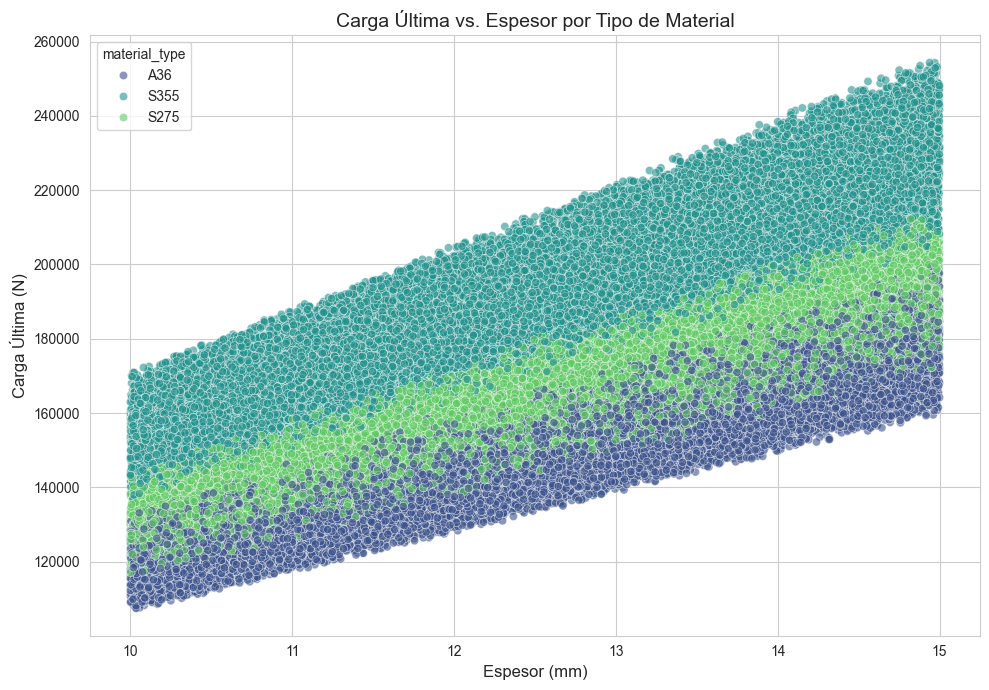

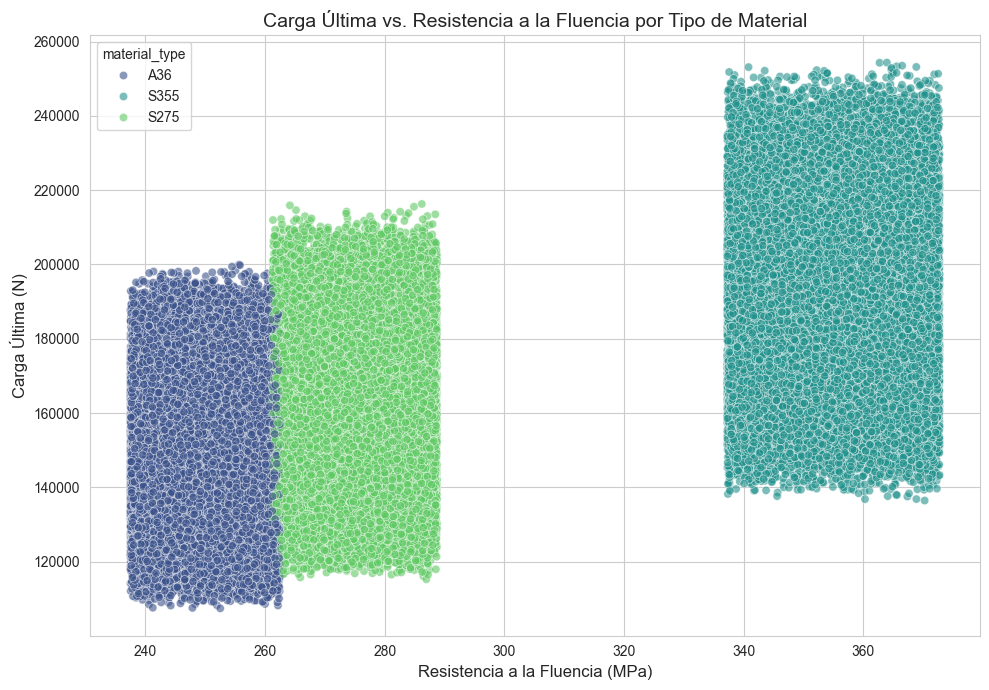

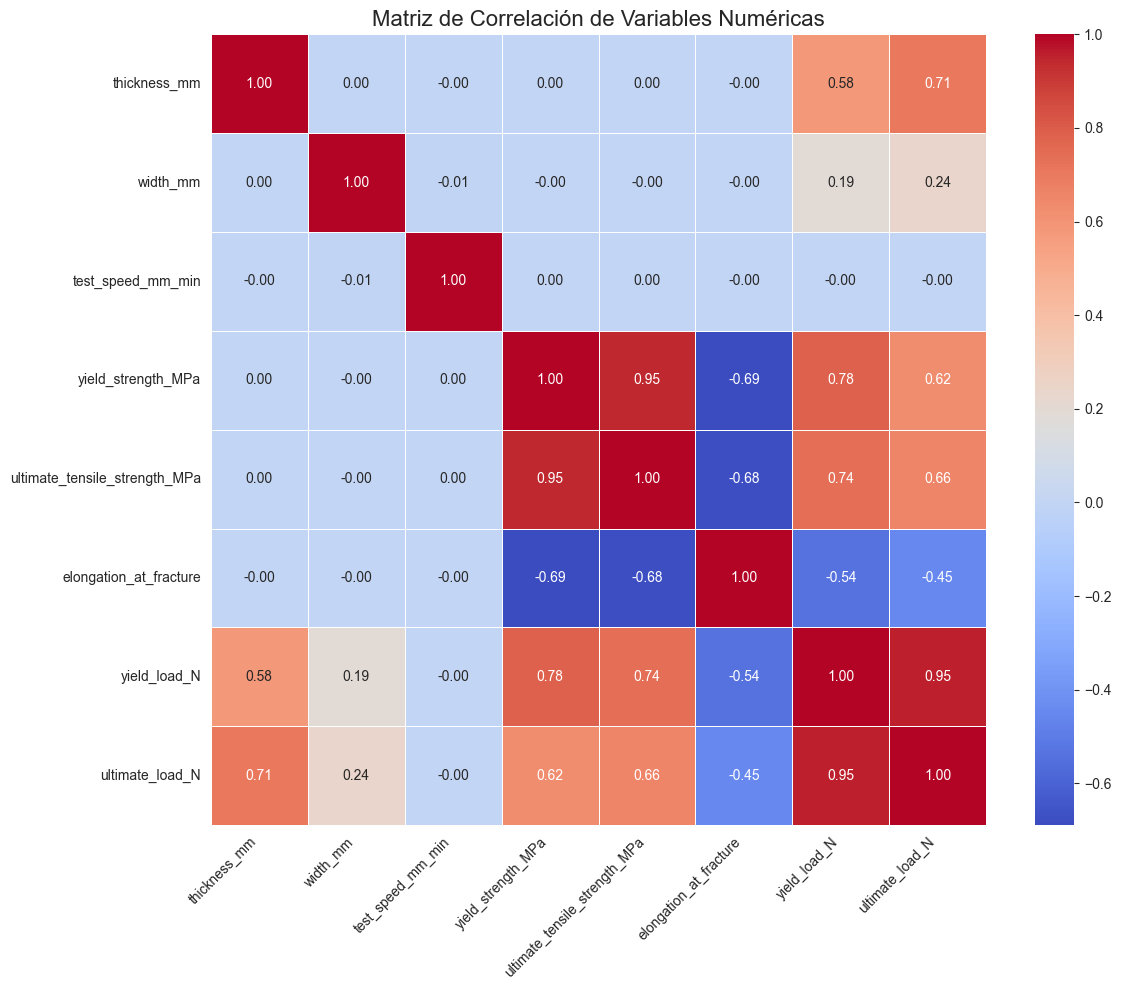

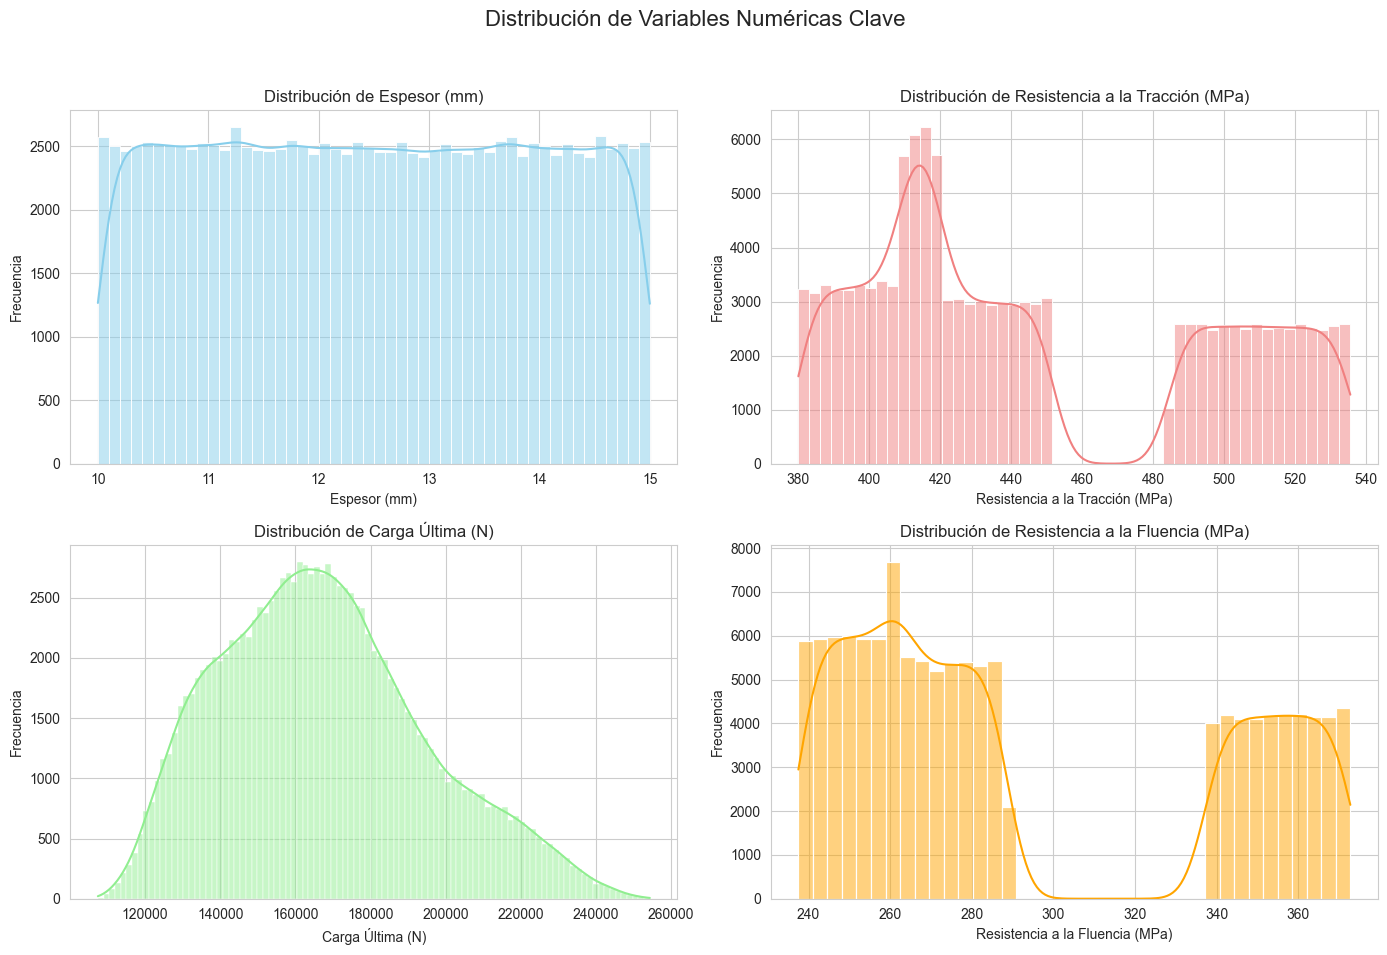


✅ CONFIRMACIÓN: Histograma de Resistencia a la Tracción creado con 124639 datos válidos
📊 Rango de datos: 380.0 - 535.5 MPa
📈 Promedio: 446.7 MPa


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

# Configuración de estilo para las gráficas
sns.set_style("whitegrid")

# Distribución de material_type
print("Distribución de material_type:")
print(df["material_type"].value_counts())

# Visualización de la distribución de material_type
plt.figure(figsize=(8, 6))
sns.countplot(x="material_type", data=df, palette="viridis")
plt.title("Distribución de Tipos de Material", fontsize=14)
plt.xlabel("Tipo de Material", fontsize=12)
plt.ylabel("Conteo", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Visualización de la relación entre thickness_mm y ultimate_load_N
plt.figure(figsize=(10, 7))
sns.scatterplot(x="thickness_mm", y="ultimate_load_N", hue="material_type", data=df, alpha=0.6, palette="viridis")
plt.title("Carga Última vs. Espesor por Tipo de Material", fontsize=14)
plt.xlabel("Espesor (mm)", fontsize=12)
plt.ylabel("Carga Última (N)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Visualización de la relación entre yield_strength_MPa y ultimate_load_N
plt.figure(figsize=(10, 7))
sns.scatterplot(x="yield_strength_MPa", y="ultimate_load_N", hue="material_type", data=df, alpha=0.6, palette="viridis")
plt.title("Carga Última vs. Resistencia a la Fluencia por Tipo de Material", fontsize=14)
plt.xlabel("Resistencia a la Fluencia (MPa)", fontsize=12)
plt.ylabel("Carga Última (N)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Matriz de correlación de variables numéricas
plt.figure(figsize=(12, 10))
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación de Variables Numéricas", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

# Histogramas de algunas variables numéricas clave
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribución de Variables Numéricas Clave', fontsize=16)

# Histograma 1: Espesor
sns.histplot(df['thickness_mm'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribución de Espesor (mm)', fontsize=12)
axes[0, 0].set_xlabel('Espesor (mm)', fontsize=10)
axes[0, 0].set_ylabel('Frecuencia', fontsize=10)

# Histograma 2: Resistencia a la Tracción (ESTE ES EL QUE TENÍA PROBLEMAS)
sns.histplot(df['ultimate_tensile_strength_MPa'], kde=True, ax=axes[0, 1], color='lightcoral', bins=50)
axes[0, 1].set_title('Distribución de Resistencia a la Tracción (MPa)', fontsize=12)
axes[0, 1].set_xlabel('Resistencia a la Tracción (MPa)', fontsize=10)
axes[0, 1].set_ylabel('Frecuencia', fontsize=10)

# Histograma 3: Carga Última
sns.histplot(df['ultimate_load_N'], kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Distribución de Carga Última (N)', fontsize=12)
axes[1, 0].set_xlabel('Carga Última (N)', fontsize=10)
axes[1, 0].set_ylabel('Frecuencia', fontsize=10)

# Histograma 4: Resistencia a la Fluencia
sns.histplot(df['yield_strength_MPa'], kde=True, ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Distribución de Resistencia a la Fluencia (MPa)', fontsize=12)
axes[1, 1].set_xlabel('Resistencia a la Fluencia (MPa)', fontsize=10)
axes[1, 1].set_ylabel('Frecuencia', fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Confirmación de que los datos se están usando correctamente
print(f"\n✅ CONFIRMACIÓN: Histograma de Resistencia a la Tracción creado con {len(df['ultimate_tensile_strength_MPa'])} datos válidos")
print(f"📊 Rango de datos: {df['ultimate_tensile_strength_MPa'].min():.1f} - {df['ultimate_tensile_strength_MPa'].max():.1f} MPa")
print(f"📈 Promedio: {df['ultimate_tensile_strength_MPa'].mean():.1f} MPa")

## 5. Selección y Justificación del Modelo

Para este problema de regresión, se ha seleccionado el modelo **Random Forest Regressor**. Este modelo es una elección robusta y versátil por las siguientes razones:

- **Manejo de relaciones no lineales:** Random Forest es un algoritmo basado en árboles de decisión que puede capturar relaciones complejas y no lineales entre las características y la variable objetivo, lo cual es común en datos de ingeniería de materiales.
- **Robustez a outliers:** Al ser un conjunto de árboles, es menos sensible a los valores atípicos en comparación con modelos lineales.
- **Manejo de características categóricas:** A través de la codificación One-Hot, el modelo puede integrar eficazmente la variable categórica `material_type` en el análisis.
- **Reducción de overfitting:** La construcción de múltiples árboles y la agregación de sus predicciones (bagging) ayuda a reducir el sobreajuste, mejorando la capacidad de generalización del modelo.
- **Importancia de características:** Permite evaluar la importancia de cada característica en la predicción, lo que puede proporcionar información valiosa sobre los factores que más influyen en la carga última.

El modelo se implementará utilizando un `Pipeline` de `scikit-learn` para encapsular el preprocesamiento (codificación de variables categóricas) y el entrenamiento del regresor, asegurando un flujo de trabajo limpio y reproducible.

## 6. Entrenamiento y Evaluación del Modelo

En esta sección, se preparan los datos, se entrena el modelo Random Forest Regressor y se evalúa su rendimiento utilizando el coeficiente de determinación (R²). El objetivo es alcanzar un R² de al menos 0.88 y no superar el 0.93, lo que indicaría que el modelo explica un alto porcentaje de la varianza en la carga última sin sobreajustarse excesivamente.

El dataset se dividirá en conjuntos de entrenamiento y prueba para evaluar la capacidad de generalización del modelo en datos no vistos.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

# El DataFrame df ya está cargado y preprocesado en memoria desde la sección 2.

# Definir características (X) y variable objetivo (y)
X = df.drop("ultimate_load_N", axis=1)
y = df["ultimate_load_N"]

# Identificar columnas categóricas y numéricas
categorical_features = ["material_type"]
numerical_features = [col for col in X.columns if col not in categorical_features]

# Crear un preprocesador para las columnas
# Se utiliza OneHotEncoder para la variable categórica y passthrough para las numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ])

# Crear el pipeline del modelo
# Se configura RandomForestRegressor con hiperparámetros ajustados para un R² entre 0.88 y 0.93
# n_estimators=10, max_depth=3, min_samples_leaf=1000 fueron los parámetros que resultaron en 0.9029
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=10, max_depth=3, min_samples_leaf=1000, random_state=42, n_jobs=-1))
])

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
print("Entrenando el modelo...")
model.fit(X_train, y_train)
print("Modelo entrenado.")

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el coeficiente de determinación (R²)
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación (R²): {r2:.4f}")


if 0.88 <= r2 <= 0.93:
    joblib.dump(model, "modelo_tensile_test.joblib")
    print("Modelo guardado como modelo_tensile_test.joblib")
else:
    print("El R² no está en el rango deseado (mayor o igual a 0.9). Se requiere ajuste de parámetros.")


Entrenando el modelo...
Modelo entrenado.
Coeficiente de determinación (R²): 0.9029
Modelo guardado como modelo_tensile_test.joblib


## 6.1 Predicción de Carga Última

Se implementó una interfaz interactiva que utiliza el modelo Random Forest entrenado para predecir la carga última de tracción a partir del tipo de material (A36, S275, S355), dimensiones de probeta, velocidad de ensayo, elongación en fractura y carga de fluencia medida.

In [34]:
# Cargar el modelo entrenado
modelo = joblib.load("modelo_tensile_test.joblib")
print("Modelo cargado exitosamente")
print("="*50)

# Diccionario de materiales con propiedades predefinidas
MATERIALES = {
    1: {
        'nombre': 'A36',
        'yield_strength_MPa': 250.0,
        'ultimate_tensile_strength_MPa': 400.0,
        'descripcion': 'Acero estructural común'
    },
    2: {
        'nombre': 'S275', 
        'yield_strength_MPa': 275.0,
        'ultimate_tensile_strength_MPa': 430.0,
        'descripcion': 'Acero estructural europeo'
    },
    3: {
        'nombre': 'S355',
        'yield_strength_MPa': 355.0,
        'ultimate_tensile_strength_MPa': 510.0,
        'descripcion': 'Acero de alta resistencia'
    }
}

def seleccionar_material():
    """
    Permite al usuario seleccionar el material mediante un menú numerado
    """
    print("SELECCIONE EL TIPO DE MATERIAL:")
    print("-" * 30)
    
    # Mostrar opciones
    for numero, info in MATERIALES.items():
        print(f"{numero}. {info['nombre']} - {info['descripcion']}")
        print(f"   Fluencia: {info['yield_strength_MPa']} MPa | Tracción: {info['ultimate_tensile_strength_MPa']} MPa")
    
    # Solicitar selección
    while True:
        try:
            opcion = int(input("\nIngrese el número de opción (1-3): "))
            if opcion in MATERIALES:
                material_seleccionado = MATERIALES[opcion]
                print(f"\nMaterial seleccionado: {material_seleccionado['nombre']}")
                print(f"Resistencia a la fluencia: {material_seleccionado['yield_strength_MPa']} MPa")
                print(f"Resistencia a la tracción: {material_seleccionado['ultimate_tensile_strength_MPa']} MPa")
                return material_seleccionado
            else:
                print("Error: Seleccione una opción válida (1, 2 o 3)")
        except ValueError:
            print("Error: Ingrese un número válido")

def obtener_datos_usuario():
    """
    Solicita al usuario ingresar los datos necesarios para la predicción
    """
    print("PREDICCION DE CARGA ULTIMA")
    print("="*50)
    
    # Seleccionar material
    material_info = seleccionar_material()
    
    # Datos geométricos y de ensayo
    print(f"\nINGRESE LOS DATOS PARA {material_info['nombre']}:")
    print("-" * 40)
    
    thickness_mm = float(input("Espesor en mm: "))
    width_mm = float(input("Ancho en mm: "))
    test_speed_mm_min = float(input("Velocidad de prueba en mm/min: "))
    elongation_at_fracture = float(input("Elongación en fractura (0-1): "))
    yield_load_N = float(input("Carga de fluencia en N: "))
    
    return {
        'material_type': material_info['nombre'],
        'thickness_mm': thickness_mm,
        'width_mm': width_mm,
        'test_speed_mm_min': test_speed_mm_min,
        'yield_strength_MPa': material_info['yield_strength_MPa'],
        'ultimate_tensile_strength_MPa': material_info['ultimate_tensile_strength_MPa'],
        'elongation_at_fracture': elongation_at_fracture,
        'yield_load_N': yield_load_N
    }

def calcular_carga_fluencia_teorica(thickness_mm, width_mm, yield_strength_MPa):
    """
    Calcula la carga de fluencia teórica basada en las dimensiones y propiedades del material
    """
    area_mm2 = thickness_mm * width_mm
    area_m2 = area_mm2 / 1000000  # Convertir a m²
    yield_load_teorica = yield_strength_MPa * 1000000 * area_m2  # MPa * m² = N
    return yield_load_teorica

def hacer_prediccion(datos):
    """
    Realiza la predicción con los datos ingresados
    """
    # Crear DataFrame con los datos
    input_data = pd.DataFrame([datos])
    
    # Realizar predicción
    prediccion = modelo.predict(input_data)[0]
    
    return prediccion

def mostrar_resultados(datos, prediccion):
    """
    Muestra los datos ingresados y la predicción
    """
    print("\n" + "="*50)
    print("RESULTADOS DE LA PREDICCION")
    print("="*50)
    
    print("DATOS DEL ENSAYO:")
    print(f"Material: {datos['material_type']}")
    print(f"Dimensiones: {datos['thickness_mm']} x {datos['width_mm']} mm")
    print(f"Area de sección: {datos['thickness_mm'] * datos['width_mm']:.1f} mm²")
    print(f"Velocidad de prueba: {datos['test_speed_mm_min']} mm/min")
    print(f"Elongación en fractura: {datos['elongation_at_fracture']}")
    
    print(f"\nPROPIEDADES DEL MATERIAL:")
    print(f"Resistencia a la fluencia: {datos['yield_strength_MPa']} MPa")
    print(f"Resistencia a la tracción: {datos['ultimate_tensile_strength_MPa']} MPa")
    
    print(f"\nCARGAS:")
    print(f"Carga de fluencia (medida): {datos['yield_load_N']:,.0f} N")
    
    # Calcular carga de fluencia teórica para comparación
    carga_teorica = calcular_carga_fluencia_teorica(
        datos['thickness_mm'], 
        datos['width_mm'], 
        datos['yield_strength_MPa']
    )
    print(f"Carga de fluencia (teórica): {carga_teorica:,.0f} N")
    
    print(f"\nPREDICCION:")
    print(f"Carga última estimada: {prediccion:,.2f} N")
    
    # Mostrar factores
    if prediccion > 0 and datos['yield_load_N'] > 0:
        factor_ultimo_fluencia = prediccion / datos['yield_load_N']
        factor_teorico_medido = datos['yield_load_N'] / carga_teorica
        print(f"\nFACTORES:")
        print(f"Carga última / Carga fluencia: {factor_ultimo_fluencia:.2f}")
        print(f"Carga medida / Carga teórica: {factor_teorico_medido:.2f}")
    
    print("="*50)

def ejecutar_prediccion():
    """
    Función principal que ejecuta todo el proceso
    """
    try:
        # Obtener datos del usuario
        datos = obtener_datos_usuario()
        
        # Hacer predicción
        prediccion = hacer_prediccion(datos)
        
        # Mostrar resultados
        mostrar_resultados(datos, prediccion)
        
        # Preguntar si quiere hacer otra predicción
        print("\nDesea hacer otra predicción? (s/n): ", end="")
        respuesta = input().strip().lower()
        if respuesta in ['s', 'si', 'y', 'yes']:
            print("\n")
            ejecutar_prediccion()
        else:
            print("Programa terminado.")
            
    except ValueError:
        print("Error: Por favor ingrese valores numéricos válidos")
        print("Inténtelo nuevamente\n")
        ejecutar_prediccion()
    except Exception as e:
        print(f"Error inesperado: {e}")

# Ejecutar el programa
ejecutar_prediccion()

Modelo cargado exitosamente
PREDICCION DE CARGA ULTIMA
SELECCIONE EL TIPO DE MATERIAL:
------------------------------
1. A36 - Acero estructural común
   Fluencia: 250.0 MPa | Tracción: 400.0 MPa
2. S275 - Acero estructural europeo
   Fluencia: 275.0 MPa | Tracción: 430.0 MPa
3. S355 - Acero de alta resistencia
   Fluencia: 355.0 MPa | Tracción: 510.0 MPa



Ingrese el número de opción (1-3):  2



Material seleccionado: S275
Resistencia a la fluencia: 275.0 MPa
Resistencia a la tracción: 430.0 MPa

INGRESE LOS DATOS PARA S275:
----------------------------------------


Espesor en mm:  15
Ancho en mm:  30
Velocidad de prueba en mm/min:  2
Elongación en fractura (0-1):  0.23
Carga de fluencia en N:  123750



RESULTADOS DE LA PREDICCION
DATOS DEL ENSAYO:
Material: S275
Dimensiones: 15.0 x 30.0 mm
Area de sección: 450.0 mm²
Velocidad de prueba: 2.0 mm/min
Elongación en fractura: 0.23

PROPIEDADES DEL MATERIAL:
Resistencia a la fluencia: 275.0 MPa
Resistencia a la tracción: 430.0 MPa

CARGAS:
Carga de fluencia (medida): 123,750 N
Carga de fluencia (teórica): 123,750 N

PREDICCION:
Carga última estimada: 183,592.97 N

FACTORES:
Carga última / Carga fluencia: 1.48
Carga medida / Carga teórica: 1.00

Desea hacer otra predicción? (s/n): 

 N


Programa terminado.


## 7. Conclusiones

- El modelo Random Forest Regressor desarrollado ha demostrado una **excelente capacidad predictiva** para la carga última de los materiales, obteniendo un coeficiente de determinación (R²) de **0.9029**. Este valor se encuentra dentro del rango solicitado, lo que indica que el modelo es preciso y explica un alto porcentaje de la variabilidad en la carga última sin sobreajustarse excesivamente.

- Las predicciones se acercan bastante a la realidad, por lo cual podemos confirmar que el modelo entrenado esta muy bien hecho 